In [1]:
# importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns


In [2]:
# Reading the csv file
df_stroke = pd.read_csv('stroke.csv')

0    4861
1     249
Name: stroke, dtype: int64

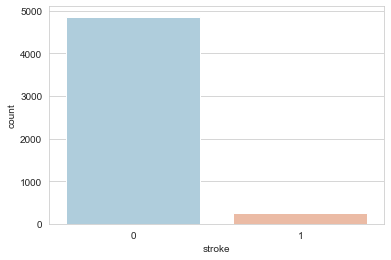

In [3]:
# gathering some information about the output variable
sns.set_style('whitegrid')
sns.countplot(x='stroke', data=df_stroke,palette='RdBu_r')
df_stroke.stroke.value_counts()

0    751
1    249
Name: stroke, dtype: int64

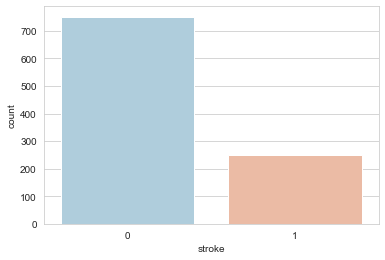

In [4]:
# since the ratio of class of output variable is too large (4861:249)
# we should slice the data so that the ratio decreases
# lets take first 1000 data and check if the ratio is acceptable
df_stroke = df_stroke[:1000]
sns.set_style('whitegrid')
sns.countplot(x='stroke', data=df_stroke, palette='RdBu_r')
df_stroke.stroke.value_counts()

<AxesSubplot:>

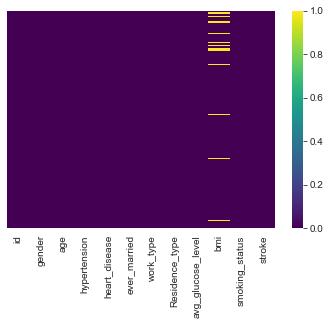

In [5]:
# gathering information about the null values in dataframe
sns.heatmap(df_stroke.isnull(), yticklabels=False, cbar=True, cmap='viridis')

In [6]:
# knowing more about data using info() method
print(df_stroke.info())
# finding which features really matter in predicting the target variable
print(df_stroke.corr())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   gender             1000 non-null   object 
 2   age                1000 non-null   float64
 3   hypertension       1000 non-null   int64  
 4   heart_disease      1000 non-null   int64  
 5   ever_married       1000 non-null   object 
 6   work_type          1000 non-null   object 
 7   Residence_type     1000 non-null   object 
 8   avg_glucose_level  1000 non-null   float64
 9   bmi                942 non-null    float64
 10  smoking_status     1000 non-null   object 
 11  stroke             1000 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None
                         id       age  hypertension  heart_disease  \
id                 1.000000  0.030230     -0.041954       0.031712   
age           

<AxesSubplot:>

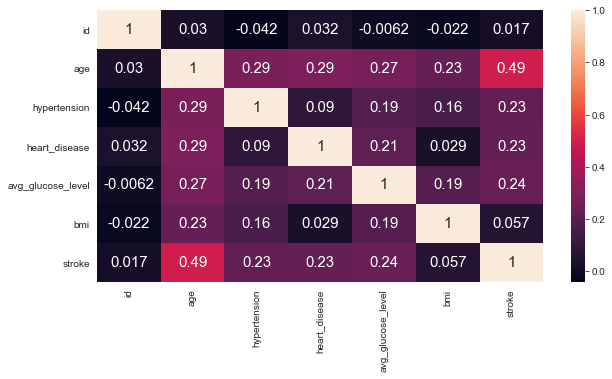

In [7]:
# visualizing the corelation so that we can get to know about the relation between
# the features at a glance
plt.figure(figsize=(10,5))
sns.heatmap(df_stroke.corr(), annot=True, annot_kws={"size":15})

<AxesSubplot:xlabel='hypertension', ylabel='count'>

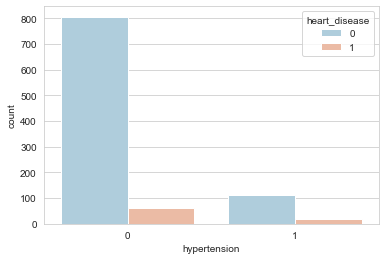

In [8]:
# checking the dependence of hypertension and heart_disease
sns.set_style('whitegrid')
sns.countplot(x='hypertension', hue='heart_disease', data=df_stroke, palette='RdBu_r')

In [9]:
print(df_stroke[(df_stroke.hypertension == 1) & (df_stroke.heart_disease == 1)].shape[0])

19


In [10]:
print ("0 - Male =", len(df_stroke[(df_stroke.hypertension == 0) & (df_stroke.gender == 'Male')]), end= ", ")
print ("0 - Female =", len(df_stroke[(df_stroke.hypertension == 0) & (df_stroke.gender == 'Female')]), end= ", ")
print ("1 - Male =", len(df_stroke[(df_stroke.hypertension == 1) & (df_stroke.gender == 'Male')]), end= ", ")
print ("1 - Female =", len(df_stroke[(df_stroke.hypertension == 1) & (df_stroke.gender == 'Female')]), end= ", ")

0 - Male = 356, 0 - Female = 512, 1 - Male = 52, 1 - Female = 80, 

<AxesSubplot:xlabel='stroke', ylabel='count'>

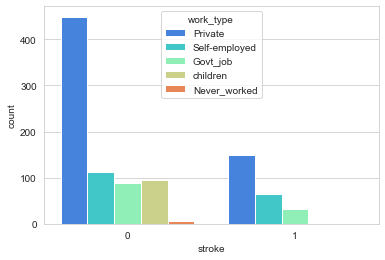

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='stroke',hue='work_type',data=df_stroke,palette='rainbow')


In [12]:
print ("0 - work_type-Private =", len(df_stroke[(df_stroke.stroke == 0) & (df_stroke.work_type == 'Private')]), end= ", ")
print ("0 - work_type-Self-employed =", len(df_stroke[(df_stroke.stroke == 0) & (df_stroke.work_type == 'Self-employed')]), end= ", ")
print ("0 - work_type-Govt_job =", len(df_stroke[(df_stroke.stroke == 0) & (df_stroke.work_type == 'Govt_job')]), end= ", ")
print ("0 - work_type-children =", len(df_stroke[(df_stroke.stroke == 0) & (df_stroke.work_type == 'children')]), end= ", ")
print ("1 - work_type-Private =", len(df_stroke[(df_stroke.stroke == 1) & (df_stroke.work_type == 'Private')]), end= ", ")
print ("1 - work_type-Self-employed =", len(df_stroke[(df_stroke.stroke == 1) & (df_stroke.work_type == 'Self-employed')]), end= ", ")
print ("1 - work_type-Govt_job =", len(df_stroke[(df_stroke.stroke == 1) & (df_stroke.work_type == 'Govt_job')]), end= ", ")
print ("0 - work_type-children =", len(df_stroke[(df_stroke.stroke == 1) & (df_stroke.work_type == 'children')]), end= ", ")


0 - work_type-Private = 449, 0 - work_type-Self-employed = 113, 0 - work_type-Govt_job = 89, 0 - work_type-children = 95, 1 - work_type-Private = 149, 1 - work_type-Self-employed = 65, 1 - work_type-Govt_job = 33, 0 - work_type-children = 2, 

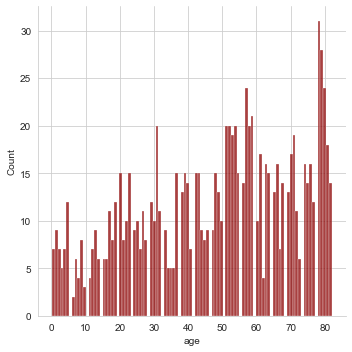

In [13]:
sns.displot(df_stroke['age'].dropna(),kde=False,color='darkred',bins=100)

In [14]:
# calculating the median of bmi as it will be needed to replace the null values of bmi
print ("Median of bmi for strokes-1 =", np.median(df_stroke[['bmi']].dropna()), end= ", ")

Median of bmi for strokes-1 = 28.45, 

In [79]:
# function that will help us to replace the null values of bmi with its ,median values
def impute_bmi(cols):
    bmi = cols[0]
    if pd.isnull(bmi):
        return 28.45
    else:
        return bmi


In [80]:
# replacing the null values of bmi with its median value (28.45)
df_stroke['bmi']=df_stroke[['bmi']].apply(impute_bmi,axis=1)

<AxesSubplot:>

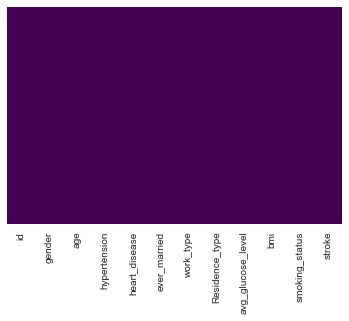

In [17]:
# cross-checking if the values are correctly replaced or not
sns.heatmap(df_stroke.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
# cross-checking the data as well using info method
print(df_stroke.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   gender             1000 non-null   object 
 2   age                1000 non-null   float64
 3   hypertension       1000 non-null   int64  
 4   heart_disease      1000 non-null   int64  
 5   ever_married       1000 non-null   object 
 6   work_type          1000 non-null   object 
 7   Residence_type     1000 non-null   object 
 8   avg_glucose_level  1000 non-null   float64
 9   bmi                1000 non-null   float64
 10  smoking_status     1000 non-null   object 
 11  stroke             1000 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


#### Replacing the object type variables with numerical types

In [19]:
df_stroke.gender.replace(["Female", "Male"], [0,1], inplace = True)
df_stroke.ever_married.replace(["Yes", "No"], [1, 0], inplace = True)
df_stroke.Residence_type.replace(["Rural", "Urban"], [0, 1], inplace = True)
df_stroke.work_type.replace(["Private", "Self-employed", "Govt_job", "children", 
                            "Never_worked"], [0,1,2,3,4], inplace = True)
df_stroke.smoking_status.replace(["never smoked", "Unknown", "formerly smoked", "smokes"], 
                                [0,1,2,3], inplace = True)

In [20]:
# cross-checking if the values are successfully replaced
print(df_stroke['gender'].head(), df_stroke['ever_married'].head(), df_stroke['Residence_type'].head()
     , df_stroke['work_type'].head(), df_stroke['smoking_status'].head())

0    1
1    0
2    1
3    0
4    0
Name: gender, dtype: int64 0    1
1    1
2    1
3    1
4    1
Name: ever_married, dtype: int64 0    1
1    0
2    0
3    1
4    0
Name: Residence_type, dtype: int64 0    0
1    1
2    0
3    0
4    1
Name: work_type, dtype: int64 0    2
1    0
2    0
3    3
4    0
Name: smoking_status, dtype: int64


In [21]:
# cross-checking using info if the values of object types are replaced by numerical type
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   age                1000 non-null   float64
 3   hypertension       1000 non-null   int64  
 4   heart_disease      1000 non-null   int64  
 5   ever_married       1000 non-null   int64  
 6   work_type          1000 non-null   int64  
 7   Residence_type     1000 non-null   int64  
 8   avg_glucose_level  1000 non-null   float64
 9   bmi                1000 non-null   float64
 10  smoking_status     1000 non-null   int64  
 11  stroke             1000 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 93.9 KB


In [22]:
# dropping the id column as it has no relation with stroke data
df_stroke.drop(["id"], inplace = True, axis = 1)

In [23]:
# lastly checking the data if it is ready to be used for training the data
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.00,0,1,1,0,1,228.69,36.60,2,1
1,0,61.00,0,0,1,1,0,202.21,28.45,0,1
2,1,80.00,0,1,1,0,0,105.92,32.50,0,1
3,0,49.00,0,0,1,0,1,171.23,34.40,3,1
4,0,79.00,1,0,1,1,0,174.12,24.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1,1.40,0,0,0,3,1,90.51,18.90,1,0
996,1,0.24,0,0,0,3,0,118.87,16.30,1,0
997,1,55.00,0,0,1,0,0,56.42,31.80,0,0
998,0,29.00,0,0,0,0,1,73.67,21.00,1,0


### Importing modules which are common to all the models

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# splitting the data for training and testing
# 70% of the data are kept for training and 30% of the data are kept for the testing
x_train_logistics,x_test_logistics,y_train_logistics,y_test_logistics=train_test_split(df_stroke.drop('stroke',axis=1),df_stroke['stroke'],test_size=0.30,random_state=101)

# validating if the rows are correctly divided
print("No. of Train rows -> ",len(y_train_logistics), 0.70 * df_stroke.shape[0])
print("No. of Test rows -> ",len(y_test_logistics), 0.30 * df_stroke.shape[0])
print(x_train_logistics.shape)
print(y_train_logistics.shape)

No. of Train rows ->  700 700.0
No. of Test rows ->  300 300.0
(700, 10)
(700,)


In [27]:
# printing if the train and test data are correctly seperated
print(x_train_logistics.head())
print(y_train_logistics.head())
print(x_test_logistics.head())
print(y_test_logistics.head())

     gender   age  hypertension  heart_disease  ever_married  work_type  \
290       1  13.0             0              0             0          3   
167       1  79.0             1              0             1          0   
486       1  20.0             0              0             0          0   
683       0   2.0             0              0             0          3   
876       0  37.0             0              0             1          0   

     Residence_type  avg_glucose_level    bmi  smoking_status  
290               1             114.84  18.30               1  
167               0              75.02  28.45               0  
486               0             104.48  21.70               0  
683               0              79.89  31.60               1  
876               1             106.35  29.70               0  
290    0
167    1
486    0
683    0
876    0
Name: stroke, dtype: int64
     gender   age  hypertension  heart_disease  ever_married  work_type  \
545       1  18.0 

In [28]:
# creating an object of LogisticRegression() class which will help us in 
# training and testing our model
logmodel=LogisticRegression()

# fitting the training data so that model learns from previous data
logmodel.fit(x_train_logistics,y_train_logistics)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# predicting the output of the model for the testing data
# data testing is very important as based on it we will decide if the model is 
# correctly trained and accurate or not
prediction_logistics=logmodel.predict(x_test_logistics)
# printing if model successfully predicted or not
print(prediction_logistics,len(prediction_logistics))

[0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 1] 300


In [30]:
# print(classification_report(y_test,predictions))
# checking the accuracy of the model
cr_logistics = classification_report(y_test_logistics, prediction_logistics)
print(cr_logistics)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       218
           1       0.60      0.43      0.50        82

    accuracy                           0.77       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.75      0.77      0.75       300



In [82]:
# checking the correct and incorrect predicted outputs w.r.t. actual data
cm_logistic = confusion_matrix(y_test_logistics, prediction_logistics)
# print(cm_logistic)
confusion_df = pd.DataFrame(confusion_matrix(y_test_logistics,prediction_logistics), 
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

# print(confusion_df)
confusion_df

,Predicted Class 0,Predicted Class 1
Class 0,195,23
Class 1,47,35


In [32]:
prfs_logistics = precision_recall_fscore_support(y_test_logistics, prediction_logistics)
prfs_logistics

(array([0.80578512, 0.60344828]),
 array([0.89449541, 0.42682927]),
 array([0.84782609, 0.5       ]),
 array([218,  82], dtype=int64))

In [33]:
# printing the coefficients
print(logmodel.coef_)

[[ 0.05950003  0.09041615  0.30826379 -0.04003717 -0.63456406 -0.00778149
  -0.18408982  0.00368878  0.00707087  0.12446337]]


In [34]:
# printing the intercept
print(logmodel.intercept_)

[-6.64444119]


# Decision Tree

In [35]:
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.00,0,1,1,0,1,228.69,36.60,2,1
1,0,61.00,0,0,1,1,0,202.21,28.45,0,1
2,1,80.00,0,1,1,0,0,105.92,32.50,0,1
3,0,49.00,0,0,1,0,1,171.23,34.40,3,1
4,0,79.00,1,0,1,1,0,174.12,24.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1,1.40,0,0,0,3,1,90.51,18.90,1,0
996,1,0.24,0,0,0,3,0,118.87,16.30,1,0
997,1,55.00,0,0,1,0,0,56.42,31.80,0,0
998,0,29.00,0,0,0,0,1,73.67,21.00,1,0


In [36]:
# spliting the data for training and testing
x_train_tree,x_test_tree, y_train_tree, y_test_tree = train_test_split(df_stroke.drop("stroke", axis = 1), df_stroke["stroke"], test_size = 0.3, random_state = 176)

In [37]:
# cheking if the data is successfully seperated
x_train_tree, y_train_tree

(     gender   age  hypertension  heart_disease  ever_married  work_type  \
 314       0  78.0             1              0             1          0   
 207       1  78.0             0              0             0          1   
 127       0  80.0             0              0             1          0   
 145       1  66.0             0              0             1          0   
 50        0  76.0             0              0             0          0   
 ..      ...   ...           ...            ...           ...        ...   
 920       0  21.0             0              0             0          2   
 836       0  51.0             0              0             0          0   
 757       1  19.0             0              0             0          0   
 701       1  38.0             0              0             1          0   
 832       0  33.0             0              0             1          0   
 
      Residence_type  avg_glucose_level    bmi  smoking_status  
 314               1 

In [38]:
x_test_tree, y_test_tree

(     gender   age  hypertension  heart_disease  ever_married  work_type  \
 752       0  78.0             0              0             0          0   
 271       0  49.0             0              0             1          0   
 919       1   8.0             0              0             0          3   
 865       1  52.0             0              0             1          0   
 42        1  82.0             0              1             1          0   
 ..      ...   ...           ...            ...           ...        ...   
 868       0  51.0             0              0             1          0   
 765       0  56.0             0              0             1          0   
 593       0  30.0             0              0             1          0   
 135       0  71.0             0              0             1          2   
 973       0  49.0             0              0             0          0   
 
      Residence_type  avg_glucose_level    bmi  smoking_status  
 752               1 

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
# creating an object of DecisionTreeClassifier for training and testing of data
dt_train_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
dt_train_gini.fit(x_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [41]:
prediction_tree = dt_train_gini.predict(x_test_tree)

In [42]:
cr_tree = classification_report(y_test_tree,prediction_tree)
print(cr_tree)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       239
           1       0.53      0.59      0.56        61

    accuracy                           0.81       300
   macro avg       0.71      0.73      0.72       300
weighted avg       0.82      0.81      0.81       300



In [43]:
cm_tree = confusion_matrix(y_test_tree, prediction_tree)
print(cm_tree)
confusion_df = pd.DataFrame(confusion_matrix(y_test_tree,prediction_tree), 
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])
confusion_df

[[207  32]
 [ 25  36]]


,Predicted Class 0,Predicted Class 1
Class 0,207,32
Class 1,25,36


In [44]:
prfs_tree = precision_recall_fscore_support(y_test_tree, prediction_tree)
prfs_tree

(array([0.89224138, 0.52941176]),
 array([0.86610879, 0.59016393]),
 array([0.87898089, 0.55813953]),
 array([239,  61], dtype=int64))

In [45]:
# exporting the visualizing graph on a text file
from sklearn import tree
with open("dt_train_gini.txt", "w") as f:
    f = tree.export_graphviz(dt_train_gini, out_file=f)

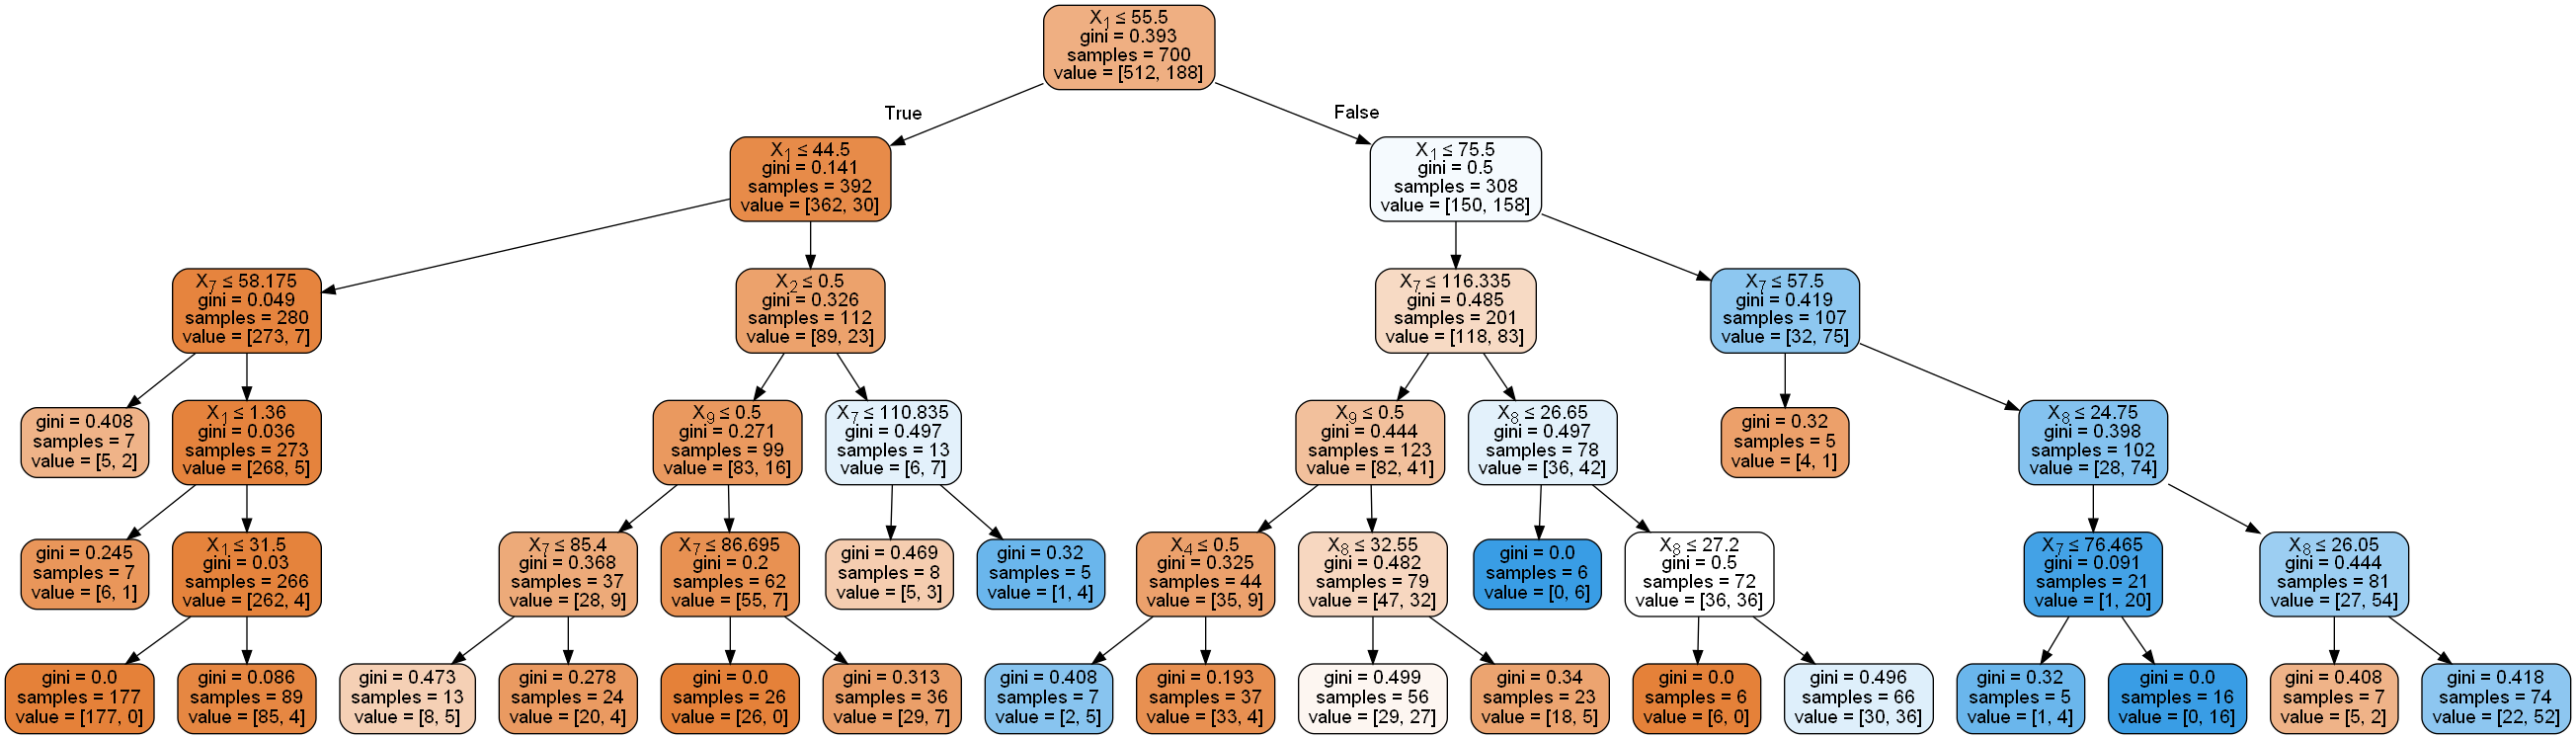

In [46]:
# visualizing the graph
from io import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_train_gini, out_file=dot_data,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# K Nearest Neighbour

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

In [84]:
df_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.00,0,1,1,0,1,228.69,36.60,2,1
1,0,61.00,0,0,1,1,0,202.21,28.45,0,1
2,1,80.00,0,1,1,0,0,105.92,32.50,0,1
3,0,49.00,0,0,1,0,1,171.23,34.40,3,1
4,0,79.00,1,0,1,1,0,174.12,24.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1,1.40,0,0,0,3,1,90.51,18.90,1,0
996,1,0.24,0,0,0,3,0,118.87,16.30,1,0
997,1,55.00,0,0,1,0,0,56.42,31.80,0,0
998,0,29.00,0,0,0,0,1,73.67,21.00,1,0


In [85]:
# splitting the training and test data
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(df_stroke.drop(["stroke"], axis = 1),
                                                                    df_stroke["stroke"], test_size = 0.30, random_state = 0)
knn_classifier =  KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_classifier.fit(x_train_knn, y_train_knn)
st_x = StandardScaler()
x_train_knn = st_x.fit_transform(x_train_knn)
x_test_knn = st_x.transform(x_test_knn)

In [86]:
# printing the data if they are split properly
print(x_train_knn[:5])
print(y_train_knn[:5])
print(x_test_knn[:5])
print(y_train_knn[:5])

[[ 1.18553713  0.40241273 -0.4010765  -0.29201253  0.6435382  -0.72590088
   0.94982836 -0.59482224 -0.14759054  1.70821431]
 [ 1.18553713  0.44639117 -0.4010765  -0.29201253  0.6435382  -0.72590088
   0.94982836 -0.51734352  0.05680762  0.8002796 ]
 [ 1.18553713  0.22649899  2.49328996 -0.29201253  0.6435382  -0.72590088
  -1.0528218   1.69977016 -0.14759054  1.70821431]
 [ 1.18553713  0.40241273  2.49328996 -0.29201253  0.6435382  -0.72590088
  -1.0528218   2.18613148  1.5733101   0.8002796 ]
 [ 1.18553713  0.66628334 -0.4010765  -0.29201253  0.6435382   1.2098348
   0.94982836 -0.35469735  0.20186438 -1.01558983]]
105    1
68     1
479    0
399    0
434    0
Name: stroke, dtype: int64
[[ 1.18553713  0.66628334 -0.4010765  -0.29201253  0.6435382  -0.72590088
  -1.0528218  -0.5559843  -0.6552892  -0.10765512]
 [ 1.18553713 -0.25726379 -0.4010765  -0.29201253  0.6435382  -0.72590088
   0.94982836  0.45892777  0.83483933  1.70821431]
 [ 1.18553713  0.88617551 -0.4010765  -0.29201253  0.

In [87]:
# training the model
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2 )
knn_classifier.fit(x_train_knn, y_train_knn)


KNeighborsClassifier()

In [88]:
prediction_knn = knn_classifier.predict(x_test_knn)
print(prediction_knn)

[0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 1]


In [89]:
cr_knn = classification_report(y_test_knn,prediction_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       239
           1       0.43      0.46      0.44        61

    accuracy                           0.77       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.77      0.77      0.77       300



In [90]:
cm = confusion_matrix(y_test_knn, prediction_knn)
print(cm)
print("Accuracy is: ", metrics.accuracy_score(y_test_knn, prediction_knn))

[[202  37]
 [ 33  28]]
Accuracy is:  0.7666666666666667


In [91]:
prfs_knn = precision_recall_fscore_support(y_test_knn, prediction_knn)
prfs_knn

(array([0.85957447, 0.43076923]),
 array([0.84518828, 0.45901639]),
 array([0.85232068, 0.44444444]),
 array([239,  61], dtype=int64))

# Comparision between different models 

In [92]:
prfs_logistics

(array([0.80578512, 0.60344828]),
 array([0.89449541, 0.42682927]),
 array([0.84782609, 0.5       ]),
 array([218,  82], dtype=int64))

In [93]:
prfs_tree

(array([0.89224138, 0.52941176]),
 array([0.86610879, 0.59016393]),
 array([0.87898089, 0.55813953]),
 array([239,  61], dtype=int64))

In [94]:
prfs_knn

(array([0.85957447, 0.43076923]),
 array([0.84518828, 0.45901639]),
 array([0.85232068, 0.44444444]),
 array([239,  61], dtype=int64))

[Text(0.5, 0, 'Precision Class 0'), Text(0, 0.5, 'Values')]

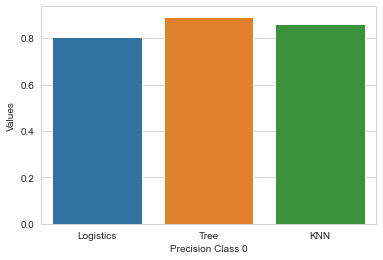

In [109]:
bar_plot = sns.barplot(x = ["Logistics","Tree", "KNN"],y = [prfs_logistics[0][0],
                                                            prfs_tree[0][0], prfs_knn[0][0]],orient = "vertical")
bar_plot.set(xlabel = "Precision Class 0", ylabel = "Values")
# print(prfs_logistics[0][0],prfs_tree[0][0], prfs_knn[0][0], sep = "\n")

[Text(0.5, 0, 'Precision Class 1'), Text(0, 0.5, 'Values')]

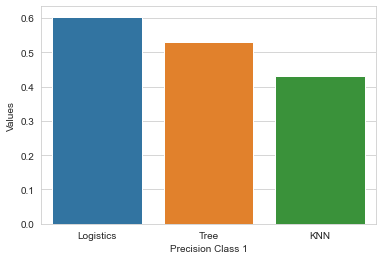

In [96]:
bar_plot = sns.barplot(x = ["Logistics","Tree", "KNN"],y = [prfs_logistics[0][1],
                                                            prfs_tree[0][1], prfs_knn[0][1]],orient = "vertical")
bar_plot.set(xlabel = "Precision Class 1", ylabel = "Values")

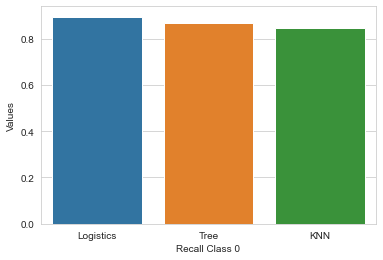

In [97]:
bar_plot = sns.barplot(x = ["Logistics","Tree", "KNN"],y = [prfs_logistics[1][0],
                                                            prfs_tree[1][0], prfs_knn[1][0]],orient = "vertical")
bar_plot.set(xlabel = "Recall Class 0", ylabel = "Values")
print()

[Text(0.5, 0, 'Recall Class 1'), Text(0, 0.5, 'Values')]

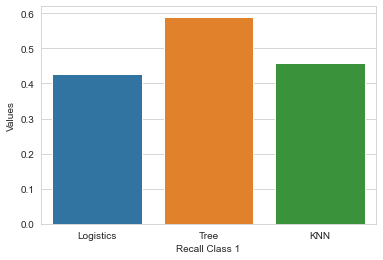

In [98]:
bar_plot = sns.barplot(x = ["Logistics","Tree", "KNN"],y = [prfs_logistics[1][1],
                                                            prfs_tree[1][1], prfs_knn[1][1]],orient = "vertical")
bar_plot.set(xlabel = "Recall Class 1", ylabel = "Values")

[Text(0.5, 0, 'F-Score Class 0'), Text(0, 0.5, 'Values')]

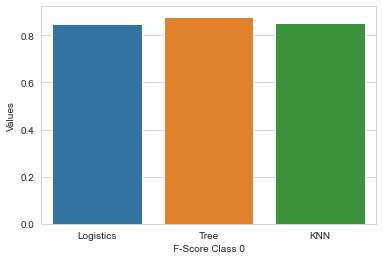

In [99]:
bar_plot = sns.barplot(x = ["Logistics","Tree", "KNN"],y = [prfs_logistics[2][0],
                                                            prfs_tree[2][0], prfs_knn[2][0]],orient = "vertical")
bar_plot.set(xlabel = "F-Score Class 0", ylabel = "Values")

[Text(0.5, 0, 'F-Score Class 1'), Text(0, 0.5, 'Values')]

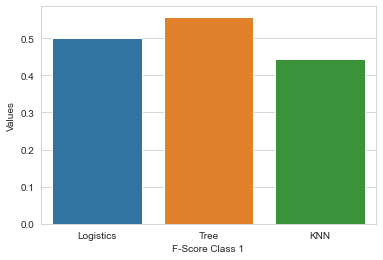

In [100]:
bar_plot = sns.barplot(x = ["Logistics","Tree", "KNN"],y = [prfs_logistics[2][1],
                                                            prfs_tree[2][1], prfs_knn[2][1]],orient = "vertical")
bar_plot.set(xlabel = "F-Score Class 1", ylabel = "Values")

[Text(0.5, 0, 'Support Class 0'), Text(0, 0.5, 'Values')]

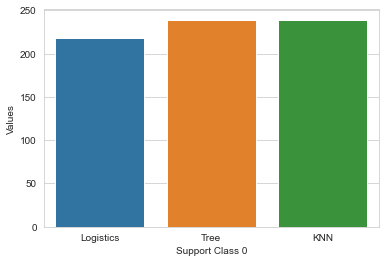

In [101]:
bar_plot = sns.barplot(x = ["Logistics","Tree", "KNN"],y = [prfs_logistics[3][0],
                                                            prfs_tree[3][0], prfs_knn[3][0]],orient = "vertical")
bar_plot.set(xlabel = "Support Class 0", ylabel = "Values")

[Text(0.5, 0, 'Support Class 1'), Text(0, 0.5, 'Values')]

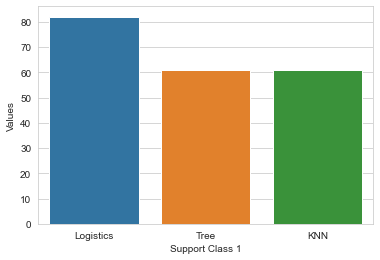

In [102]:
bar_plot = sns.barplot(x = ["Logistics","Tree", "KNN"],y = [prfs_logistics[3][1],
                                                            prfs_tree[3][1], prfs_knn[3][1]],orient = "vertical")
bar_plot.set(xlabel = "Support Class 1", ylabel = "Values")

Accuracy of Logistic Regression model:  0.77
Accuracy of Decision Tree model:  0.81
Accuracy of K Nearest Neighbour:  0.77


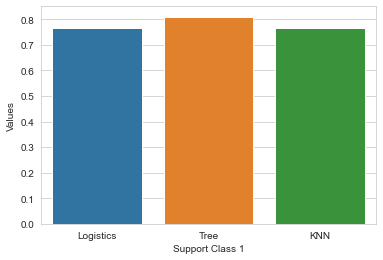

In [111]:
bar_plot = sns.barplot(x = ["Logistics","Tree", "KNN"],y = [metrics.accuracy_score(y_test_logistics,prediction_logistics),
                                                            metrics.accuracy_score(y_test_tree,prediction_tree),
                                                            metrics.accuracy_score(y_test_knn,prediction_knn)],
                                                            orient = "vertical")
bar_plot.set(xlabel = "Support Class 1", ylabel = "Values")
print("Accuracy of Logistic Regression model: ", round(metrics.accuracy_score(y_test_logistics,prediction_logistics), 2))
print("Accuracy of Decision Tree model: ", metrics.accuracy_score(y_test_tree,prediction_tree))
print("Accuracy of K Nearest Neighbour: ", round(metrics.accuracy_score(y_test_knn,prediction_knn), 2))

### Hence for this data set we found that the accuracy of **Decision Tree Model** is highest.

In [104]:
print("End of the program")

End of the program
